## Part 1. Heart attack analysis

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,age,gender,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


About data:

age - age

gender - gender (1 = male; 0 = female)

cp - type of chest pain (1 = typical angina; 2 = atypical angina; 3 = non-anginal pain; 0 = asymptomatic)

trtbps - blood pressure at rest (in mmHg upon admission to the hospital)

chol - serum cholesterol in mg/dl

fbs - Fasting blood sugar > 120 mg/dl (1 = True; 0 = False)

restecg - resting electrocardiography results (1 = normal; 2 = ST-T wave abnormality; 0 = hypertrophy)

thalachh - achieved maximum heart rate

exng - Exercise-induced angina (1 = yes; 0 = no)

oldpeak - Exercise-induced ST depression compared to resting state

slp - peak ST segment slope under load (2 = ascending; 1 = flat; 0 = descending)

caa - number of large vessels (0-3) stained by fluoroscopy

thall - 2 = normal; 1 = fixed defect; 3 = reversible defect

output - target variable - 0 = low probability of heart attack; 1 = more likely to have a heart attack

#### Exploratory analysis

In [3]:
df[['age']].describe()

,age
count,303.000000
mean,54.366337
std,9.082101
min,29.000000
25%,47.500000
50%,55.000000
75%,61.000000
max,77.000000


In [4]:
df[df['gender'] == 1].shape

(207, 14)

In [5]:
df[df['gender'] == 0].shape

(96, 14)

In [6]:
pd.crosstab(df['gender'], df['output'], normalize = 'index')

output,0,1
gender,,
0,0.250000,0.750000
1,0.550725,0.449275


In [7]:
df[ df['output'] == 1 ]['age'].min()

29

In [8]:
df.loc[ df['output'] == 1 ]['age'].min()

29

In [9]:
df.isnull().sum()

age         0
gender      0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
df.columns

Index(['age', 'gender', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [11]:
pd.crosstab(df['fbs'], df['output'], normalize = 'index')

output,0,1
fbs,,
0,0.449612,0.550388
1,0.488889,0.511111


In [12]:
import numpy as np

In [13]:
np.corrcoef(df['trtbps'], df['output'])

array([[ 1.        , -0.14493113],
       [-0.14493113,  1.        ]])

## Part 2. Heart attack prognosis

In [14]:
X = df.copy()

In [15]:
y = X.pop('output')

In [16]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

---

### 2.1. Logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [24]:
lr = LogisticRegression(max_iter = 1000)

In [25]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
lr.score(X_train, y_train)

0.8590308370044053

In [27]:
Y_pred = lr.predict(X)

In [28]:
lr.score(X_test, y_test)

0.868421052631579

---

### 2.2. Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators = 200,
                             min_samples_split  = 20,
                             min_samples_leaf = 2,
                             max_depth = 10)

In [31]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=20,
                       n_estimators=200)

In [32]:
rfc.score(X_train, y_train), rfc.score(X_test, y_test)

(0.8986784140969163, 0.8552631578947368)

In [33]:
import seaborn as sns

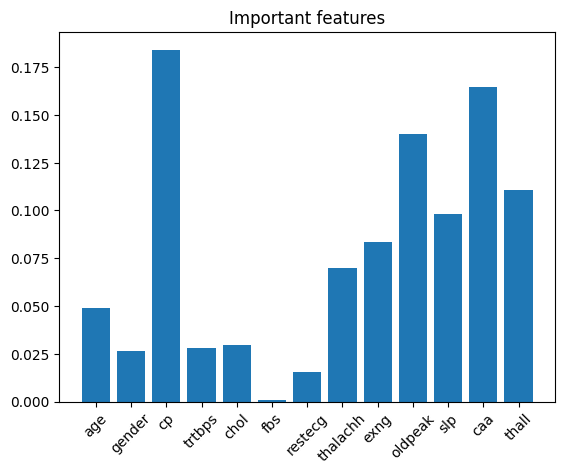

In [35]:
import matplotlib.pyplot as plt
importances = rfc.feature_importances_

names = X_train.columns.values

plt.figure()
plt.title("Important features")
plt.bar(range(X_train.shape[1]), importances)
plt.xticks(range(X_train.shape[1]), names, rotation=45)
plt.show ()

In [36]:
xxx = list(range(X_train.shape[1]))

In [40]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

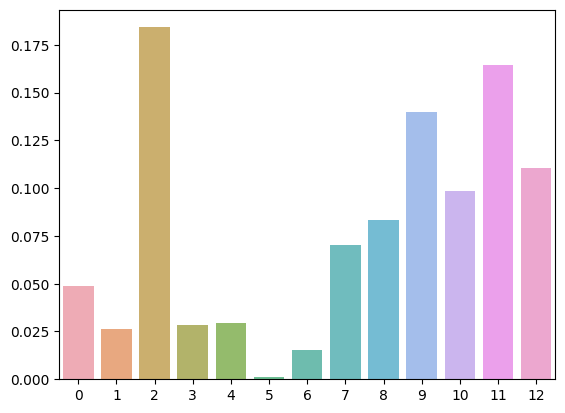

In [46]:
sns.barplot(x=xxx, y=importances, alpha=0.8)
show_values(ax);


In [50]:
rfc.score(X_train, y_train)

0.8986784140969163

In [51]:
Y_pred = rfc.predict(X)

In [52]:
rfc.score(X_test, y_test)

0.8552631578947368

---

### 2.3. Gradient Boosting Classifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [59]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.7763157894736842)

In [55]:
from sklearn.ensemble import AdaBoostClassifier

In [60]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada.score(X_train, y_train), model.score(X_test, y_test)

(0.933920704845815, 0.7763157894736842)

| Model | Score on Train Data | Score on Test Data |
| --- | --- | --- |
| Logistic Regression | 0.8590308370044053 | 0.868421052631579 |
| Random Forest Classifier | 0.8986784140969163 | 0.8552631578947368 |
| Gradient Boosting Classifier | 1.0 | 0.7763157894736842 |